<a href="https://colab.research.google.com/github/Gaurav-Bhatnagar-29/Project/blob/main/Python_CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
original=pd.read_csv('Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')

# creating a copy of original dataset
df=original.copy()
print("Shape of the dataSet" ,df.shape)
print(df.info())
print(df.describe())

Shape of the dataSet (70974, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70974 entries, 0 to 70973
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data As Of                                70974 non-null  object 
 1   Start Date                                70973 non-null  object 
 2   End Date                                  70973 non-null  object 
 3   Group                                     70973 non-null  object 
 4   Year                                      68219 non-null  float64
 5   Month                                     57203 non-null  float64
 6   State                                     70973 non-null  object 
 7   Sex                                       70973 non-null  object 
 8   Age Group                                 70973 non-null  object 
 9   COVID-19 Deaths                           51356 non-null  float64
 10  T

In [ ]:
print(df.isnull().sum())

Data As Of                                      0
Start Date                                      1
End Date                                        1
Group                                           1
Year                                         2755
Month                                       13771
State                                           1
Sex                                             1
Age Group                                       1
COVID-19 Deaths                             19618
Total Deaths                                 8394
Pneumonia Deaths                            21976
Pneumonia and COVID-19 Deaths               18368
Influenza Deaths                            15414
Pneumonia, Influenza, or COVID-19 Deaths    21543
Footnote                                    22099
dtype: int64


In [ ]:
month_missing_per=(df['Month'].isnull().sum()/df.shape[0])*100
#month_missing_per is 10% and dataset is large so we can drop these rows which will not impact our analysis
df=df[~df['Month'].isnull()]
df.shape

(57203, 16)

In [ ]:
c=['COVID-19 Deaths','Total Deaths','Pneumonia Deaths','Pneumonia and COVID-19 Deaths','Influenza Deaths','Pneumonia, Influenza, or COVID-19 Deaths']
r=df[~df['Footnote'].isnull()].index
df.loc[r, c]=df.loc[r,c].fillna(5)
print(df.isnull().sum())

Data As Of                                      0
Start Date                                      0
End Date                                        0
Group                                           0
Year                                            0
Month                                           0
State                                           0
Sex                                             0
Age Group                                       0
COVID-19 Deaths                                 0
Total Deaths                                    0
Pneumonia Deaths                                0
Pneumonia and COVID-19 Deaths                   0
Influenza Deaths                                0
Pneumonia, Influenza, or COVID-19 Deaths        0
Footnote                                    17241
dtype: int64


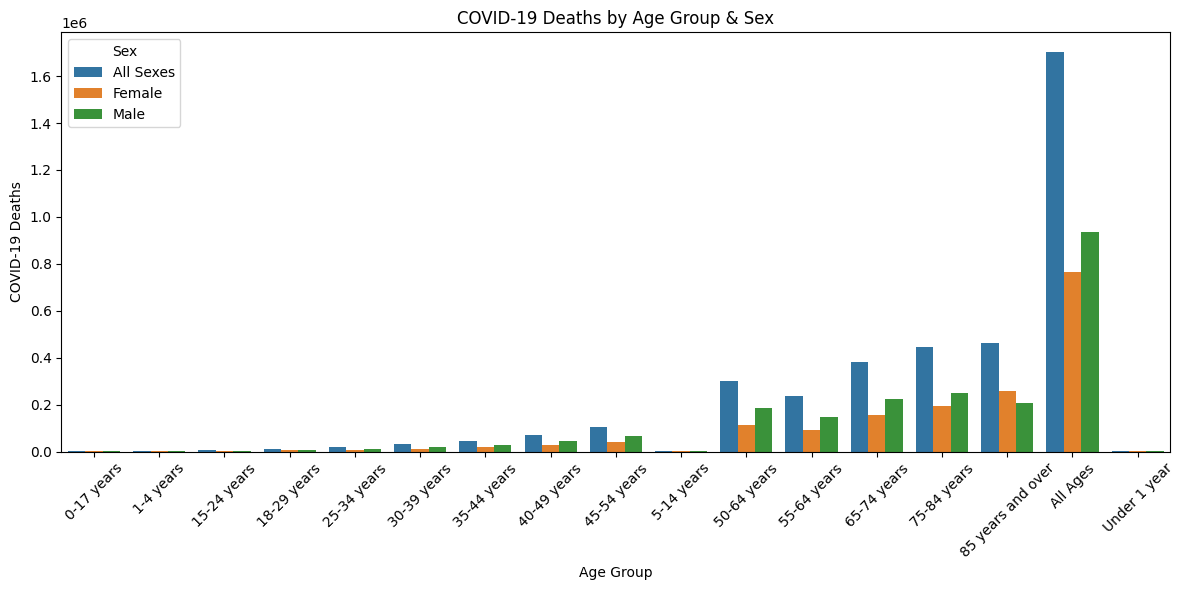

In [ ]:
age_sex_deaths = df.groupby(['Age Group', 'Sex'])['COVID-19 Deaths'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=age_sex_deaths, x='Age Group', y='COVID-19 Deaths', hue='Sex')
plt.title('COVID-19 Deaths by Age Group & Sex')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


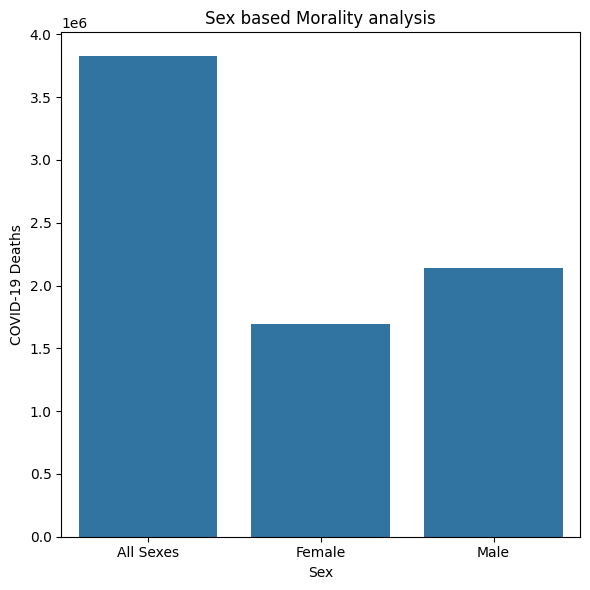

In [ ]:
sex_deaths = df.groupby('Sex')['COVID-19 Deaths'].sum().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(data=sex_deaths, x='Sex', y='COVID-19 Deaths')
plt.title('Sex based Morality analysis')
plt.tight_layout()
plt.show()


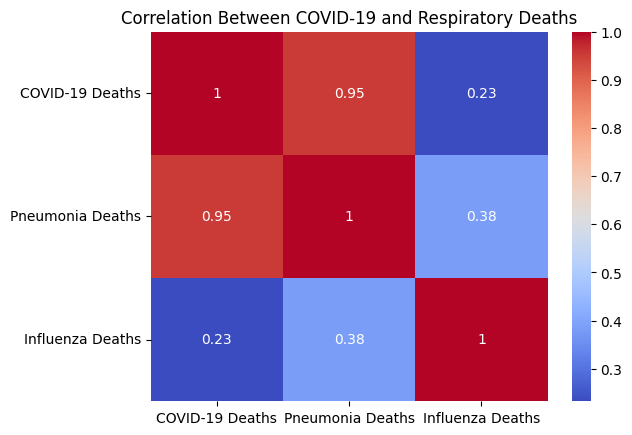

In [ ]:
corr_df = df[['COVID-19 Deaths', 'Pneumonia Deaths', 'Influenza Deaths']].corr()
sns.heatmap(corr_df, annot=True, cmap="coolwarm")
plt.title("Correlation Between COVID-19 and Respiratory Deaths")
plt.show()


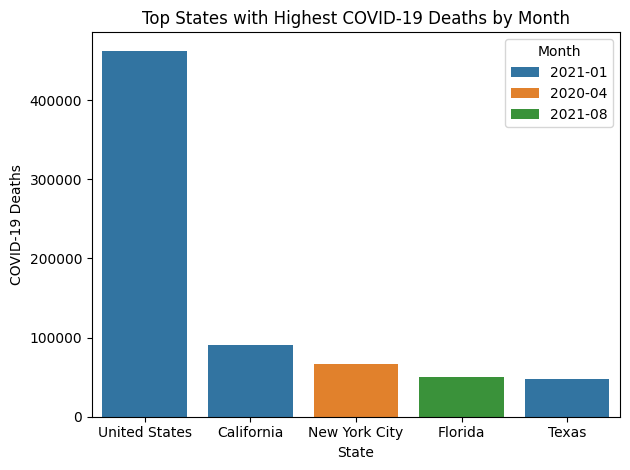

In [ ]:
df['Month'] = pd.to_datetime(df['Start Date']).dt.to_period('M')
monthly_state = df.groupby(['State', 'Month'])['COVID-19 Deaths'].sum().reset_index()

peak_month = monthly_state.loc[monthly_state.groupby('State')['COVID-19 Deaths'].idxmax()]
peak_month = peak_month.sort_values(by='COVID-19 Deaths', ascending=False).reset_index(drop=True)

peak=peak_month.head()  # shows top results
sns.barplot(data=peak, x='State', y='COVID-19 Deaths', hue='Month')
plt.title('Top States with Highest COVID-19 Deaths by Month')
plt.tight_layout()
plt.show()

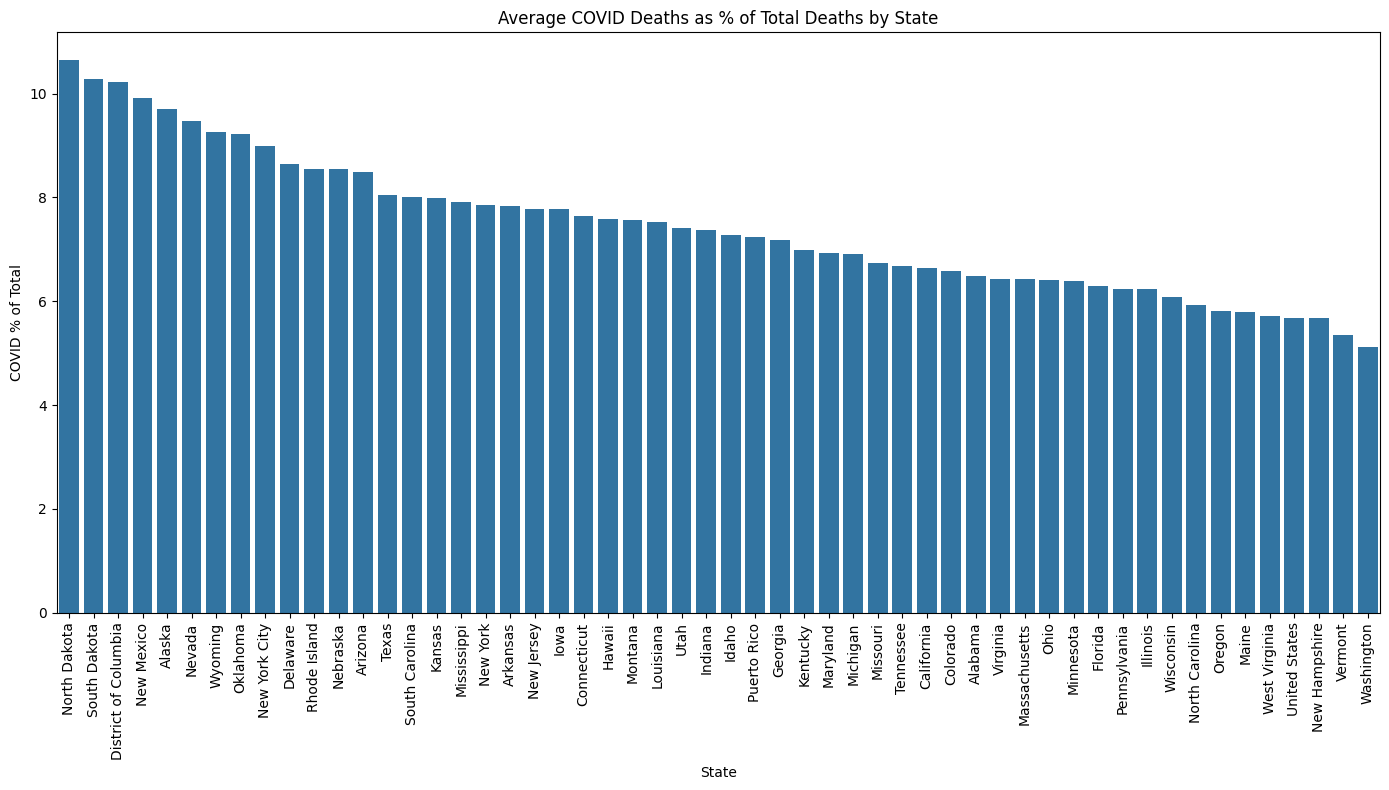

In [ ]:
df['COVID % of Total'] = (df['COVID-19 Deaths'] / df['Total Deaths']) * 100

avg_covid_percent = df.groupby('State')['COVID % of Total'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=avg_covid_percent, y='COVID % of Total', x='State')
plt.title('Average COVID Deaths as % of Total Deaths by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
